# UNIVERSITYHACK 2020
## RETO MINSAIT LAND CLASSIFICATION
### LUIS BALDERAS RUIZ

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [7]:
data = pd.read_csv('./data/Modelar_UH2020.txt', sep='|')

In [8]:
data.head()

,ID,X,Y,Q_R_4_0_0,Q_R_4_0_1,Q_R_4_0_2,Q_R_4_0_3,Q_R_4_0_4,Q_R_4_0_5,Q_R_4_0_6,...,Q_NIR_8_1_0,AREA,GEOM_R1,GEOM_R2,GEOM_R3,GEOM_R4,CONTRUCTIONYEAR,MAXBUILDINGFLOOR,CADASTRALQUALITYID,CLASE
0,35984B9C3E7CD9A1,2207357872,165920300,0.000000,443.001300,616.001697,746.998401,872.996472,1009.000946,1159.002319,...,10951.926645,144.426900,0.557237,0.067249,0.057372,0.853127,2002,0.0,2,RESIDENTIAL
1,F9D04BF6D037F8FB,2189757160,165463267,0.000059,443.899011,627.999060,770.001611,904.999988,1032.998474,1165.001636,...,7048.367637,38.342550,0.709884,0.125156,0.147929,1.181953,1949,1.0,8,RESIDENTIAL
2,B89D5711AFF8C423,2240147335,165690752,0.000000,353.502274,523.003601,644.001831,760.997131,876.999634,1006.997498,...,7013.073271,108.794384,0.517702,0.058268,0.081666,1.401552,1986,1.0,5,RESIDENTIAL
3,1C3478AC1522E7E4,2227146459,165934099,0.000000,268.000613,376.999609,478.003784,575.001233,683.997742,809.005994,...,6216.880538,155.224455,0.450871,0.053591,0.054201,1.011382,1999,1.0,2,RESIDENTIAL
4,4D12AA5009064345,2212350459,165681791,0.000000,318.997910,492.003845,632.999634,757.002197,882.999908,1019.008911,...,7092.767616,1789.873366,0.458819,0.012858,0.019936,1.550478,1966,8.0,6,RESIDENTIAL


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103230 entries, 0 to 103229
Data columns (total 56 columns):
ID                    103230 non-null object
X                     103230 non-null int64
Y                     103230 non-null int64
Q_R_4_0_0             103230 non-null float64
Q_R_4_0_1             103230 non-null float64
Q_R_4_0_2             103230 non-null float64
Q_R_4_0_3             103230 non-null float64
Q_R_4_0_4             103230 non-null float64
Q_R_4_0_5             103230 non-null float64
Q_R_4_0_6             103230 non-null float64
Q_R_4_0_7             103230 non-null float64
Q_R_4_0_8             103230 non-null float64
Q_R_4_0_9             103230 non-null float64
Q_R_4_1_0             103230 non-null float64
Q_G_3_0_0             103230 non-null float64
Q_G_3_0_1             103230 non-null float64
Q_G_3_0_2             103230 non-null float64
Q_G_3_0_3             103230 non-null float64
Q_G_3_0_4             103230 non-null float64
Q_G_3_0_5           

RESIDENTIAL    90173
INDUSTRIAL      4490
PUBLIC          2976
RETAIL          2093
OFFICE          1828
OTHER           1332
AGRICULTURE      338
Name: CLASE, dtype: int64


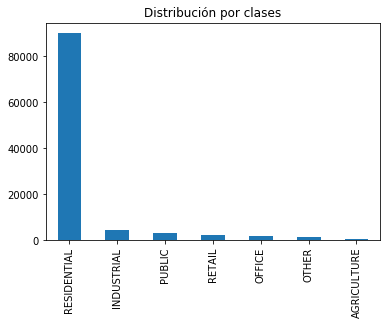

In [14]:
print(data['CLASE'].value_counts())
data['CLASE'].value_counts().plot.bar(title="Distribución por clases")

In [22]:
data.columns.to_list()[1:-1]

['X',
 'Y',
 'Q_R_4_0_0',
 'Q_R_4_0_1',
 'Q_R_4_0_2',
 'Q_R_4_0_3',
 'Q_R_4_0_4',
 'Q_R_4_0_5',
 'Q_R_4_0_6',
 'Q_R_4_0_7',
 'Q_R_4_0_8',
 'Q_R_4_0_9',
 'Q_R_4_1_0',
 'Q_G_3_0_0',
 'Q_G_3_0_1',
 'Q_G_3_0_2',
 'Q_G_3_0_3',
 'Q_G_3_0_4',
 'Q_G_3_0_5',
 'Q_G_3_0_6',
 'Q_G_3_0_7',
 'Q_G_3_0_8',
 'Q_G_3_0_9',
 'Q_G_3_1_0',
 'Q_B_2_0_0',
 'Q_B_2_0_1',
 'Q_B_2_0_2',
 'Q_B_2_0_3',
 'Q_B_2_0_4',
 'Q_B_2_0_5',
 'Q_B_2_0_6',
 'Q_B_2_0_7',
 'Q_B_2_0_8',
 'Q_B_2_0_9',
 'Q_B_2_1_0',
 'Q_NIR_8_0_0',
 'Q_NIR_8_0_1',
 'Q_NIR_8_0_2',
 'Q_NIR_8_0_3',
 'Q_NIR_8_0_4',
 'Q_NIR_8_0_5',
 'Q_NIR_8_0_6',
 'Q_NIR_8_0_7',
 'Q_NIR_8_0_8',
 'Q_NIR_8_0_9',
 'Q_NIR_8_1_0',
 'AREA',
 'GEOM_R1',
 'GEOM_R2',
 'GEOM_R3',
 'GEOM_R4',
 'CONTRUCTIONYEAR',
 'MAXBUILDINGFLOOR',
 'CADASTRALQUALITYID']

ValueError: cannot convert float NaN to integer

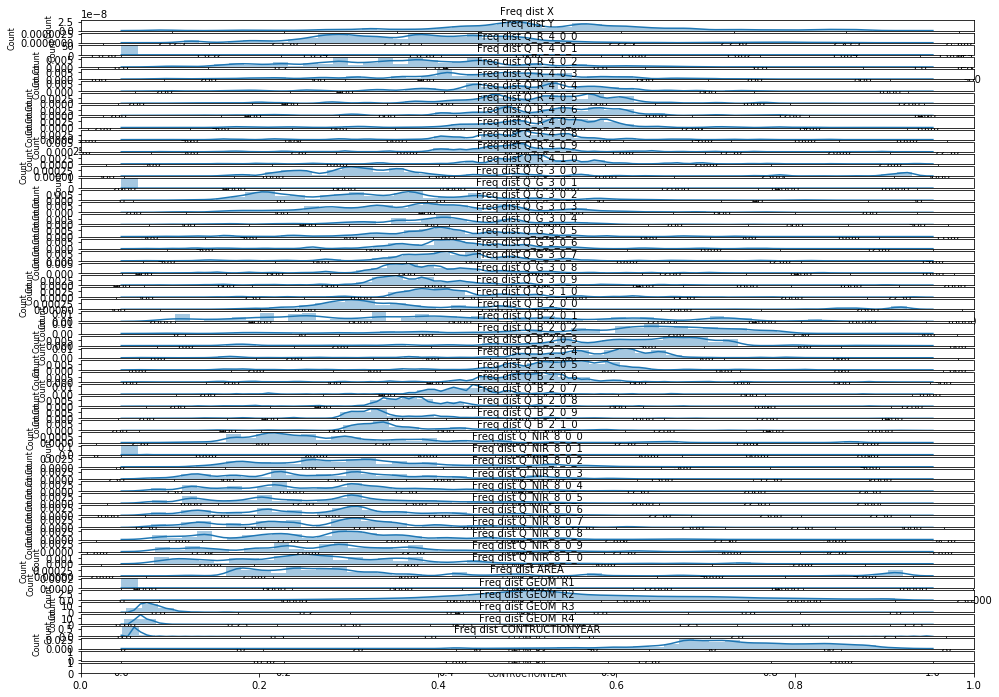

In [24]:
col_names = data.columns.to_list()[1:-1]
fig, ax = plt.subplots(len(col_names), figsize=(16,12))

for i, col_val in enumerate(col_names):

    sns.distplot(data[col_val], hist=True, ax=ax[i])
    ax[i].set_title('Freq dist '+col_val, fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)
    ax[i].set_ylabel('Count', fontsize=8)

plt.show()

In [26]:
data2 = data.drop([
      'ID','CLASE'
], axis=1)
sns.pairplot(data2)

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x7fa09e4f5830> (for post_execute):


KeyboardInterrupt: 

#### Valores perdidos

In [28]:
for col in data.columns:
    if data[col].isnull().values.any():
        print(col)
        print(data[col].isnull().values.any())
        print('####################')

MAXBUILDINGFLOOR
True
####################
CADASTRALQUALITYID
True
####################


In [33]:
print(np.sum(data['MAXBUILDINGFLOOR'].isnull().values == True))
print(np.sum(data['CADASTRALQUALITYID'].isnull().values == True))


20
20


In [39]:
data['CADASTRALQUALITYID'].describe(include='all')

count     103210
unique        12
top            4
freq       24621
Name: CADASTRALQUALITYID, dtype: object

In [35]:
data['CADASTRALQUALITYID']

0         2
1         8
2         5
3         2
4         6
         ..
103225    6
103226    4
103227    9
103228    5
103229    5
Name: CADASTRALQUALITYID, Length: 103230, dtype: object